In [1]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt

In [5]:
transition_matrix = [
    [1 / 2, 1 / 12, 1 / 6, 1 / 4],
    [1 / 3, 0, 1 / 3, 1 / 3],
    [1 / 3, 1 / 6, 1 / 6, 1 / 3],
    [1 / 3, 1 / 9, 2 / 9, 1 / 3],
]

payouts = [10, 15, -20, -5]

In [9]:
def simulate():

    running_state_idx = [choice(list(range(len(payouts))))]

    avg_earnings = [payouts[0]]
    tot_earnings = avg_earnings[-1]

    for _ in range(1000000):
        p = np.random.random()
        curr_probs = transition_matrix[running_state_idx[-1]]
        for idx, prob in enumerate(curr_probs):
            if p <= sum(curr_probs[: idx + 1]):
                running_state_idx.append(idx)
                break
        tot_earnings += payouts[running_state_idx[-1]]
        avg_earnings.append(tot_earnings / len(running_state_idx))

    return avg_earnings[10000:], running_state_idx[10000:]

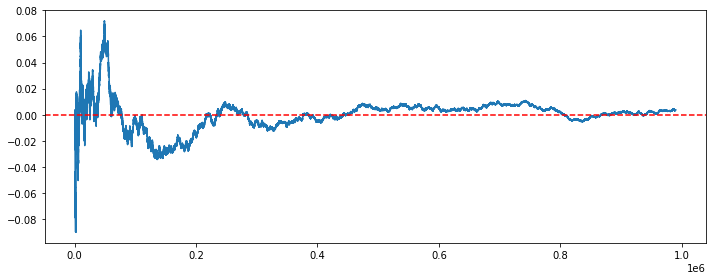

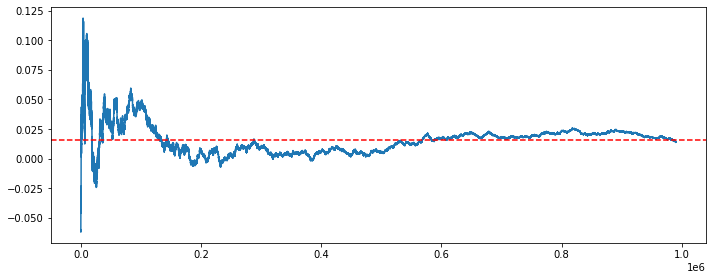

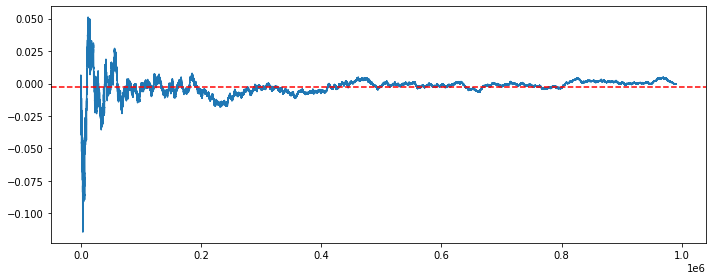

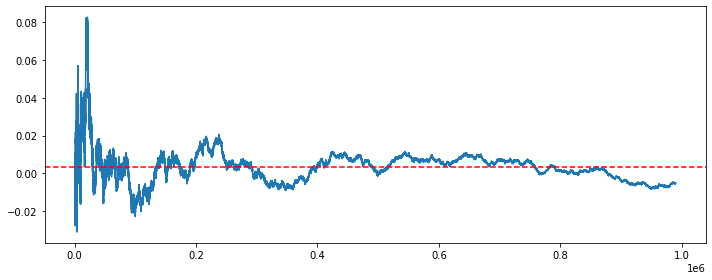

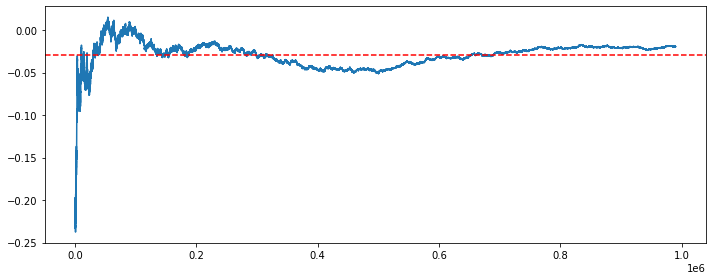

In [10]:
for i in range(5):
    avg_earnings, running_states = simulate()

    plt.figure(figsize=(10, 4))
    plt.plot(avg_earnings)
    plt.axhline(np.mean(avg_earnings), color="r", linestyle="--")
    plt.tight_layout()
    plt.savefig("%s_board_game_trial.png" % i)

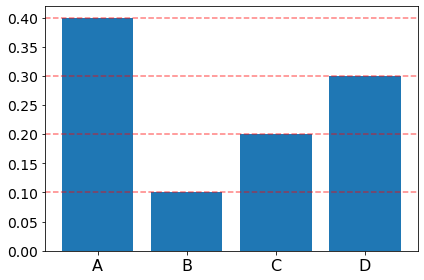

In [11]:
pcts = []
for i in np.unique(running_states):
    pcts.append(np.mean(np.array(running_states) == i))
plt.bar(["A", "B", "C", "D"], pcts)
plt.xticks(["A", "B", "C", "D"], fontsize=16)
plt.yticks(np.arange(0, 0.45, 0.05), fontsize=14)
plt.axhline(0.4, color="r", linestyle="--", alpha=0.5)
plt.axhline(0.1, color="r", linestyle="--", alpha=0.5)
plt.axhline(0.2, color="r", linestyle="--", alpha=0.5)
plt.axhline(0.3, color="r", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("board_game_props.png")